# Gradient Descent in 3d

## Introduction

previously, we talked about how we to think about moving along a 3D cost curve.

![](./gradientdescent.png)

We know that moving along the 3D cost curve above, means changing the $m$ and $b$ variables of a regression line like the one below.  And we do so with the purpose of having our line better match our data. In this section, you'll learn about *partial derivatives* which will make you achieve this.

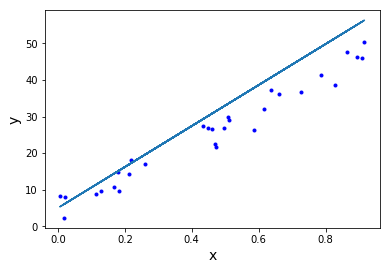

In [9]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
# np.random.seed(225)

def regression_formula(x):
    return 5 + 56*x

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

## Objectives

You will be able to:

* Understand how the process of gradient descent when altering both y-intercept and slope variables
* Understand what it means to take a partial derivative 
* Understand the rule for taking partial derivatives

## Review gradient descent in two dimensions

In this lesson, we'll learn about gradient descent in three dimensions, but let's first remember how it worked in two dimensions when we changed just one variable of our regression line.  

In two dimensions, when changing just one variable, $m$ or $b$, gradient descent means stepping forwards or backwards along the cost curve and and taking a specific step size.  To determine whether to move forwards or backwards as well as the step size, we imagine standing on this two-dimension curve (shown below) and feeling the slope of our cost curve to tell us how to move.  A step in a direction means a change in one of our regression variables.

![](./slopes.png)

So that was gradient descent in two dimensions.  What is gradient descent in three dimensions? 

## Gradient Descent in 3 dimensions

In three dimensions, we once again choose an initial regression line, which means that we are choosing a point on the graph below.  Then we begin taking steps towards the minimum.  But of course, we are now able to walk not just forwards and backwards but left and right as well -- as we now can alter two variables.  

![](./gradientdescent.png)

To get a sense of how this works, imagine our initial regression line places us at the back-left corner of the graph above, with a slope of 50, and y-intercept of negative 20.  Now imagine that we cannot see the rest of the graph - yet we still want to approach the minimum.  How do we do this?

Once again, we feel out the slope of the graph with our feet.  Only this time, as we shift our feet, we are preparing to walk in two dimensional space.  

![](./traveller-stepping.jpg)

So this is our approach.  We shift horizontally a little bit to determine the change in output in right-left direction, and then shift forward and back to determine the change in output in that direction.  From there we take the next step in the direction of the steepest descent. 

So this is why our technique of gradient descent is so powerful.  Once we consider that in moving towards our best fit lines, we have a choice of moving anywhere in a two-dimensional space, then using the slope to guide us only becomes more important.    

So how does this approach of shifting back and forth translate mathematically?  It means we determine the slope in one dimension, then the other. Then, we move where that that slope is steepest downwards.  This moves us towards our minimum.  

## Partial Derivatives

To measure the slope in each dimension, one after the other, we'll take the derivative with respect to one variable, and then take the derivative with respect to another variable.  Now let's be very explicit about what it means to take the partial derivative with respect to a variable.

Let's again talk about this procedure in general, and then we'll apply it to the cost curve.  So let's revisit our multivariable function: 

$$f(x, y) = y*x^2 $$

Remember that the function looks like the following: 

![](./parabolayx2.png)

To take a derivative with respect to $x$ means to ask, how does the output change, as we make a nudge only in the $x$ direction. To express that we are nudging in the $x$ direction we say $\frac{\delta f}{\delta x}$.  That symbol is the lower case delta.  We read this as taking the derivative with respect to $x$.  But it just means seeing the change in output as we nudge in the $x$ direction.  

And to express the change in output with respect to $y$, we say $\frac{\delta f}{\delta y}$.  And this just means calculating the change in output as we nudge our input over in the $y$ direction.

## Visualizing the partial derivative

So what does a derivative $\frac{\delta f}{\delta x}$ look like? How do we think of a partial derivative of a multivariable function?

Well remember how we think of a standard derivative of a one variable function, for example $f(x) = x^2 $. 

![](./tangent-liner.png)

So in two dimensions, to take the derivative at a given point, we simply calculate the slope of the function at that x value.

Now the partial derivative of a multivariable function is fairly similar.  But here it's equal to the slope of the tangent line at a specific $x$ value **and** a specific $y$ value.  Let's break this down by using our patented "freeze-frame" method.  The graphs below shows lines tangent to the curve in the $x$ direction.  (The tangent lines are a little small, but they and their corresponding slopes are there). 

### Graphs for $\frac{df}{dx}$

![](./partial-derivatives-3d.png)

Let's take a close look.  The top left graph shows $\frac{\delta f}{\delta x}$ at different points of $f(x, y)$ where $y = -1$.  So as you can see, $\frac{\delta f}{\delta x}f(1, 3) = -6$ as shown in the green line in the top left.  That's because when you move to that point on the graph, $(3, -1)$ and then nudge a little bit in the $x$ direction, the change in output is $-6$.  And that is represented by the line tangent to the function at that point in the $x$ direction.  You can go through the other points in these graphs, and work through the same logic. 

So with taking the partial derivative $\frac{\delta f}{\delta x}$, you may think about moving to the slice of the graph for a given value of $y$, then moving to the proper value of $x$, and then finding the tangent line at that point.  

As you can see, $\frac{\delta f}{dx}$ means the change in output from a nudge in $x$ direction, but the derivative is still influenced by $y$ component of the function.  You can see this because for different values of $y$, our slice of the graph looks different, and thus tangent lines for those slices look different.

## One more example

This can be a little mind-bending so let's go through this again for $\frac{df}{dy}f(x, y)$ where $f(x,y) = (yx^2) $.  Once again, the 3-d graph of $f(x,y) = yx^2$ is the following: 

![](./parabolayx2.png)

Now for $\frac{df}{dy}$ of a function $f(x, y) $ you can think sliding through different slices of the function but this time for different values of $x$.  So again, we have our freeze frame, but this time each frame represents ascending values along the x axis.  

First let's understand our plots below -- they may be surprising.  Starting at the top left quadrant the graph of the function $f(x,y)$ makes sense as when $x =-1$ then the function is just $f(y) = -1*y $.  And moving down to the bottom left, $f(2, y) = 2^2*y = 4y$.  

So now, to think about taking the derivative, once again we move to a slice of graph for a value of $x$, and then move in the $y$ direction.  So $\frac{df}{dy}$ at $\frac{df}{dy}f(1, y)$ = 1.  And we know that the derivative of a line is always just equal to the line's slope.  For $f(1, y)$ that slope, and thus the derivative, is always $1$.  For $f(2, y)$ it's 4.

### Graphs for $\frac{df}{dy}$

![](./partial-derivatives-dy.png)

So that is our technique for a partial derivative.  For $\frac{df}{dy} $ we move to a slice of the curve at a specific value of $x$, move to the point for y, and then calculate the change in output as we nudge in the $y$ direction.  

For $\frac{df}{dx}$ (again below), we move to a slice of a curve of a specific value of $y$, move the correct value of $x$ and then calculate how much the output changes as we nudge in the $y$ direction.  Just think slide, slide then nudge.  That's a partial derivative.

### Graphs for $\frac{df}{dx}$

![](./partial-derivatives-3d.png)

## Our rule for partial derivatives

Ok, so now that you understand the slide, slide, nudge, maybe you can understand this little shortcut that we can pull.  For any multivariable function, the variables that you are **not** taking the derivative with respect to, can just be treated as a constant.

For example, with our function of $f(x, y) = y*x^2 $, when taking the partial derivative $\frac{df}{dy}f(x, y)$, we treat all values of $y$ as a constant.  Let's do it:


$$\frac{df}{dy}f(x,y) =  \frac{df}{dy}(y) * x^2 = 1*x^2 = x^2$$

So that's all it means to take a partial derivative of something: look at what you are taking a derivative with respect to, and only take the derivative of those types of variables.  And guess what, this result lines up to what we saw earlier.

![](./partial-derivatives-dy.png)

We calculated that $\frac{df}{dy}f(x,y) = x^2 $, and that is what the graphs show.  When $x = 2$ our derivative is always 4.  And when $x$ is $3$ the derivative is always 9.  So even though we are taking $\frac{df}{dy}$, the $x$ value is influencing the steepness of that line.  But by the time we get to our nudge, that value of $x$ is **constant**, it's influenced has already been applied, and then we are seeing how the output changes as we nudge in the $y$ direction.

Now let's try our rule one more time, this time $\frac{df}{dx}f(x, y)$ for our function $f(x, y) = y*x^2 $.



$$\frac{df}{dx}f(x,y) = y*\frac{df}{dx}(x^2) = 2*y*x$$

So this time with $\frac{df}{dx}f(x,y) $, we treat $y$ as a constant, as the influence $y$ is first applied by moving to a slice of our graph for a value of $y$.  Then once there, we are evaluating the change in output as we nudge in the $x$ direction.   

![](./partial-derivatives-3d.png)

## Summary

In this section, we have learned how to think about taking the partial derivative of a function.  For the partial derivative, we say we are taking the derivative with respect to a variable.  So for example, we can say for the function $f(x, y)$, take the partial derivative with respect to the variable $x$.  This means we are assessing the output after nudging in the $x$ direction, and we can express this as $\frac{\delta f}{\delta x} $.  Our rule for taking the partial derivative is to treat the variables that we are not taking the derivative with respect to as constants.  Which makes sense, because at the time that we are taking the derivative by making our "nudge" the only variable that is changing is the variable we are taking the derivative with respect to.